# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
!pip install keras,tensorflow

ERROR: Invalid requirement: 'keras,tensorflow'


In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型

In [9]:
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.2494 - accuracy: 0.9239 - val_loss: 0.1116 - val_accuracy: 0.9661
Epoch 2/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.1080 - accuracy: 0.9683 - val_loss: 0.1422 - val_accuracy: 0.9630
Epoch 3/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0826 - accuracy: 0.9749 - val_loss: 0.1108 - val_accuracy: 0.9680
Epoch 4/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.1125 - val_accuracy: 0.9693
Epoch 5/10
48000/48000 [==============================] - 7s 143us/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0972 - val_accuracy: 0.9732
Epoch 6/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.0956 - val_accuracy: 0.9755
Epoch 7/10
48000/48000 [==============================] - 7s 1

# 以圖形顯示訓練過程

In [12]:
print(train_history.history)
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

{'val_loss': [0.11156077538896352, 0.14220835964847356, 0.11077355433255434, 0.11248748888921303, 0.09717523827791835, 0.09555524083983861, 0.09954540177700982, 0.11051094487007261, 0.1143197733162762, 0.11239436014583377], 'val_accuracy': [0.9660833477973938, 0.9629999995231628, 0.9679999947547913, 0.9693333506584167, 0.9731666445732117, 0.9754999876022339, 0.9752500057220459, 0.9741666913032532, 0.9764166474342346, 0.9767500162124634], 'loss': [0.2493778032908837, 0.10799091076517167, 0.08256684275301329, 0.06011838797594343, 0.053165155637757075, 0.04401467624840734, 0.03798944670023896, 0.03485528154057465, 0.029415330120971098, 0.025758710324692704], 'accuracy': [0.923875, 0.96829164, 0.97491664, 0.9815417, 0.9841667, 0.9871042, 0.98864585, 0.98975, 0.991125, 0.9923958]}


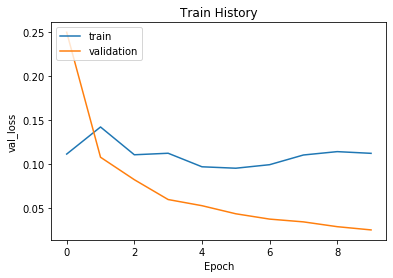

In [13]:
show_train_history(train_history,'val_loss','loss')

In [14]:
#show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 36us/step

accuracy= 0.9769999980926514
